In [1]:
import sys
sys.path.append('../')
sys.path.append('../get_branch/linear')
sys.path.append('../get_branch/cnn')
sys.path.append('../get_branch/max_pooling')
sys.path.append('../model_json/make_json_program/cnn')
sys.path.append('../util')

import json
import numpy as np
import matplotlib.pyplot as plt
import util_for_hist

import make_vgg16_json
import linear_input_branch
import linear_hidden_branch
import linear_output_branch
import cnn_input_branch
import cnn_hidden_branch
import cnn_output_branch
import max_pooling_branch

In [2]:
#画像は正方形を仮定
IMG_SIZE = 224

In [3]:
make_vgg16_json.make_json()

In [4]:
json_file = open('../model_json/json/vgg16.json', 'r')
json_value  = json.load(json_file)
json_value

{'layer0': {'input_channels': 3,
  'out_channels': 64,
  'kernel_size': 3,
  'layer_type': 'input',
  'processing_type': 'cnn',
  'skip_connection': 0},
 'layer1': {'input_channels': 64,
  'out_channels': 64,
  'kernel_size': 3,
  'layer_type': 'hidden',
  'processing_type': 'cnn',
  'skip_connection': 0},
 'layer2': {'input_channels': 64,
  'out_channels': 64,
  'stride': 2,
  'layer_type': 'hidden',
  'processing_type': 'max_pooling',
  'skip_connection': 0},
 'layer3': {'input_channels': 64,
  'out_channels': 128,
  'kernel_size': 3,
  'layer_type': 'hidden',
  'processing_type': 'cnn',
  'skip_connection': 0},
 'layer4': {'input_channels': 128,
  'out_channels': 128,
  'kernel_size': 3,
  'layer_type': 'hidden',
  'processing_type': 'cnn',
  'skip_connection': 0},
 'layer5': {'input_channels': 128,
  'out_channels': 128,
  'stride': 2,
  'layer_type': 'hidden',
  'processing_type': 'max_pooling',
  'skip_connection': 0},
 'layer6': {'input_channels': 128,
  'out_channels': 256,
  '

In [5]:
#dictからlistを作成（最初からlistを作成したほうが楽だったかも）
branch_list = np.empty(0)

for i in range(len(json_value)):
    layer_json_value = json_value["layer" + str(i)]
    
    #input層
    if layer_json_value["layer_type"] == "input":
        if layer_json_value["processing_type"] == "linear":
            branch_list = np.append(branch_list,linear_input_branch.get_branch(layer_json_value))
            
        elif layer_json_value["processing_type"] == "cnn":
            branch_list = np.append(branch_list,cnn_input_branch.get_branch(layer_json_value,IMG_SIZE))
            #print(cnn_input_branch.get_branch(layer_json_value,IMG_SIZE))
            #print(len(cnn_input_branch.get_branch(layer_json_value,IMG_SIZE)))
            #print("##########################")
            
    #hidden層
    if layer_json_value["layer_type"] == "hidden":
        if layer_json_value["processing_type"] == "linear":
            branch_list = np.append(branch_list,linear_hidden_branch.get_branch(layer_json_value))
            #print(linear_hidden_branch.get_branch(layer_json_value))
            #print(len(linear_hidden_branch.get_branch(layer_json_value)))
            #print("##########################")
        elif layer_json_value["processing_type"] == "cnn":
            branch_list = np.append(branch_list,cnn_hidden_branch.get_branch(layer_json_value,IMG_SIZE))
            #print(cnn_hidden_branch.get_branch(layer_json_value,IMG_SIZE))
            #print(len(cnn_hidden_branch.get_branch(layer_json_value,IMG_SIZE)))
            #print("##########################")
        elif layer_json_value["processing_type"] == "max_pooling":
            one_layer_branch_list, IMG_SIZE = max_pooling_branch.get_branch(layer_json_value,IMG_SIZE) 
            branch_list = np.append(branch_list,one_layer_branch_list)
            #print(one_layer_branch_list)
            #print(len(one_layer_branch_list))
            #print(IMG_SIZE)
            #print("##########################")
            
    #output層      
    if layer_json_value["layer_type"] == "output":
        if layer_json_value["processing_type"] == "linear":
            branch_list = np.append(branch_list,linear_output_branch.get_branch(layer_json_value))
            #print(linear_output_branch.get_branch(layer_json_value))
            #print(len(linear_output_branch.get_branch(layer_json_value)))
            #print("##########################")
        elif layer_json_value["processing_type"] == "cnn":
            branch_list = np.append(branch_list,cnn_output_branch.get_branch(layer_json_value,IMG_SIZE))
            
branch_list

array([ 576.,  576.,  576., ..., 1000., 1000., 1000.])

In [6]:
IMG_SIZE

7

In [7]:
sort_set_branch_list = util_for_hist.get_sort_branch_list(branch_list)
sort_set_branch_list

[1.0, 576.0, 1000.0, 1152.0, 2304.0, 4096.0, 4608.0]

In [8]:
max_branch = util_for_hist.get_max_set_branch(sort_set_branch_list)
max_branch

4608.0

In [9]:
min_sabun = util_for_hist.get_min_sabun(sort_set_branch_list)
min_sabun

152.0

In [10]:
bins = util_for_hist.get_bin(max_branch,min_sabun)
bins

31

(array([6.121472e+06, 0.000000e+00, 0.000000e+00, 3.361792e+06,
        0.000000e+00, 0.000000e+00, 4.096000e+03, 2.408448e+06,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 2.007040e+06,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 2.918400e+04,
        0.000000e+00, 0.000000e+00, 1.304576e+06]),
 array([   0.        ,  148.64516129,  297.29032258,  445.93548387,
         594.58064516,  743.22580645,  891.87096774, 1040.51612903,
        1189.16129032, 1337.80645161, 1486.4516129 , 1635.09677419,
        1783.74193548, 1932.38709677, 2081.03225806, 2229.67741935,
        2378.32258065, 2526.96774194, 2675.61290323, 2824.25806452,
        2972.90322581, 3121.5483871 , 3270.19354839, 3418.83870968,
        3567.48387097, 3716.12903226, 3864.77419355, 4013.41935484,
        4162.06451613, 4

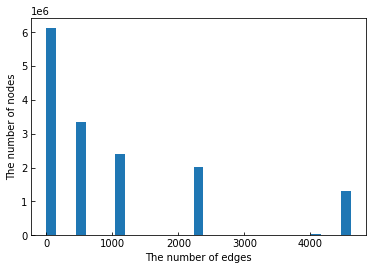

In [11]:
plt.rcParams["xtick.direction"] = "in" 
plt.rcParams["ytick.direction"] = "in" 
plt.xlabel("The number of edges")
plt.ylabel("The number of nodes")
plt.hist(branch_list,bins=bins,range=(0,max_branch))